<a href="https://colab.research.google.com/github/nyrhrn/myPrj01/blob/master/breast_cancer_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

 
# import os, shutil 
# base_dir="/content/drive/MyDrive/data Breast cancer/"
# os.mkdir(base_dir)

preparing dataset

In [ ]:
import tensorflow as tf
import keras
import numpy as np
from keras import layers
from keras.models import Model
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import glob

In [ ]:
# load_dataset
main_file = glob.glob( "/content/drive/MyDrive/Breast cancer" + '/*/*/*/*/*/*/*')
# print(main_file[2]) #malignant
# print(main_file[3]) #benign
benign_40X=glob.glob(main_file[3] + '/*/*/*/40X/*')
len(benign_40X)
malignant_40X=glob.glob(main_file[2] + '/*/*/*/40X/*')
len(malignant_40X)

1370

(460, 700, 3)

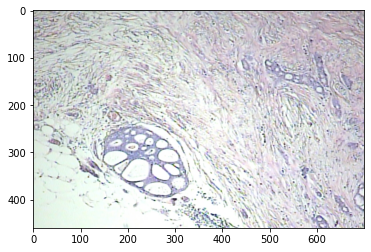

In [ ]:
import matplotlib.pyplot as plt

data=plt.imread(benign_40X[1])
plt.imshow(data)
data.shape

In [ ]:
size=150
dataset=[]
label=[]
for data in benign_40X:
  img=plt.imread(data)
  img=resize(img,(size,size))
  dataset.append(img)
  label.append(1)

for data in malignant_40X:
  img=plt.imread(data)
  img=resize(img,(size,size))
  dataset.append(img)
  label.append(0)  


In [ ]:
len(label)
label[1991]
dataset[120].shape

(150, 150, 3)

In [ ]:
label=np.array(label).reshape(-1,1)  

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test= train_test_split(dataset, label,test_size=0.2)
y_train=tf.keras.utils.to_categorical(y_train,num_classes=2)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=2)
x_train=np.array(x_train).astype('float32')
x_test=np.array(x_test).astype('float32')
x_train/=255
x_test/=255

In [ ]:
from keras.applications.vgg16 import VGG16
model_vgg=VGG16(include_top=False, input_shape=(size,size,3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:

layer_1=layers.Flatten()(model_vgg.layers[-1].output)##
layer_2=layers.Dropout(0.3)(layer_1)
layer_3=layers.Dense(128,activation="relu")(layer_2)
layer_4=layers.Dense(2,activation="softmax")(layer_3)
model=Model(model_vgg.inputs,layer_4)

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer, loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
50/50 [==============================] - 68s 357ms/step - loss: 0.6585 - accuracy: 0.6440 - val_loss: 0.6127 - val_accuracy: 0.6992
Epoch 2/100
50/50 [==============================] - 10s 208ms/step - loss: 0.6250 - accuracy: 0.6899 - val_loss: 0.6167 - val_accuracy: 0.6992
Epoch 3/100
50/50 [==============================] - 10s 209ms/step - loss: 0.6354 - accuracy: 0.6700 - val_loss: 0.6115 - val_accuracy: 0.6992
Epoch 4/100
50/50 [==============================] - 11s 210ms/step - loss: 0.6437 - accuracy: 0.6672 - val_loss: 0.6126 - val_accuracy: 0.6992
Epoch 5/100
50/50 [==============================] - 11s 211ms/step - loss: 0.6321 - accuracy: 0.6787 - val_loss: 0.6129 - val_accuracy: 0.6992
Epoch 6/100
50/50 [==============================] - 11s 212ms/step - loss: 0.6488 - accuracy: 0.6586 - val_loss: 0.6119 - val_accuracy: 0.6992
Epoch 7/100
50/50 [==============================] - 11s 213ms/step - loss: 0.6217 - accuracy: 0.6966 - val_loss: 0.6219 - val_accuracy:

In [ ]:
first_model=tf.keras.applications.resnet.ResNet101(include_top=False, input_shape=(size,size,3))

171450368/171446536 [==============================] - 1s 0us/step


In [ ]:
layer_1=layers.Flatten()(model_vgg.layers[-1].output)##
layer_2=layers.Dropout(0.3)(layer_1)
layer_3=layers.Dense(128,activation="relu")(layer_2)
layer_4=layers.Dense(2,activation="softmax")(layer_3)
model=Model(model_vgg.inputs,layer_4)

In [ ]:
optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer, loss="binary_crossentropy",metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
50/50 [==============================] - 13s 220ms/step - loss: 0.6409 - accuracy: 0.6846 - val_loss: 0.6138 - val_accuracy: 0.6992
Epoch 2/100
50/50 [==============================] - 10s 210ms/step - loss: 0.6122 - accuracy: 0.7040 - val_loss: 0.6195 - val_accuracy: 0.6992
Epoch 3/100
50/50 [==============================] - 11s 210ms/step - loss: 0.6379 - accuracy: 0.6719 - val_loss: 0.6121 - val_accuracy: 0.6992
Epoch 4/100
50/50 [==============================] - 11s 212ms/step - loss: 0.6333 - accuracy: 0.6739 - val_loss: 0.6149 - val_accuracy: 0.6992
Epoch 5/100
50/50 [==============================] - 11s 213ms/step - loss: 0.6438 - accuracy: 0.6604 - val_loss: 0.6152 - val_accuracy: 0.6992
Epoch 6/100
50/50 [==============================] - 11s 213ms/step - loss: 0.6131 - accuracy: 0.6979 - val_loss: 0.6138 - val_accuracy: 0.6992
Epoch 7/100
50/50 [==============================] - 11s 214ms/step - loss: 0.6261 - accuracy: 0.6836 - val_loss: 0.6156 - val_accuracy:

In [ ]:
first_model=tf.keras.applications.resnet.ResNet152(include_top=False, input_shape=(size,size,3))
layer_1=layers.Flatten()(model_vgg.layers[-1].output)##
layer_2=layers.Dropout(0.3)(layer_1)
layer_3=layers.Dense(128,activation="relu")(layer_2)
layer_4=layers.Dense(2,activation="softmax")(layer_3)
model=Model(model_vgg.inputs,layer_4)
optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer, loss="binary_crossentropy",metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

# layer_1=tf.keras.layers.Flatten()(first_model.layers[-1].output)##   we should use tf 
# layer_2=tf.keras.layers.Dense(128,activation="relu")(layer_1)
# layer_3=tf.keras.layers.Dense(2,activation="softmax")(layer_2)
# model=Model(first_model.inputs,layer_3)
# optimizer=keras.optimizers.Adam()
# model.compile(optimizer, loss="categorical_crossentropy",metrics=['accuracy'])


234700800/234698864 [==============================] - 1s 0us/step
Epoch 1/100
50/50 [==============================] - 12s 215ms/step - loss: 0.6677 - accuracy: 0.5689 - val_loss: 0.6126 - val_accuracy: 0.6992
Epoch 2/100
50/50 [==============================] - 10s 205ms/step - loss: 0.6236 - accuracy: 0.6885 - val_loss: 0.6131 - val_accuracy: 0.6992
Epoch 3/100
50/50 [==============================] - 10s 206ms/step - loss: 0.6257 - accuracy: 0.6823 - val_loss: 0.6146 - val_accuracy: 0.6992
Epoch 4/100
50/50 [==============================] - 10s 207ms/step - loss: 0.6251 - accuracy: 0.6881 - val_loss: 0.6121 - val_accuracy: 0.6992
Epoch 5/100
50/50 [==============================] - 10s 208ms/step - loss: 0.6240 - accuracy: 0.6857 - val_loss: 0.6121 - val_accuracy: 0.6992
Epoch 6/100
50/50 [==============================] - 10s 209ms/step - loss: 0.6237 - accuracy: 0.6832 - val_loss: 0.6126 - val_accuracy: 0.6992
Epoch 7/100
50/50 [==============================] - 10s 209ms/step -

In [ ]:
first_model=tf.keras.applications.vgg19.VGG19(include_top=False, input_shape=(size,size,3))
layer_1=layers.Flatten()(model_vgg.layers[-1].output)##
layer_2=layers.Dropout(0.3)(layer_1)
layer_3=layers.Dense(128,activation="relu")(layer_2)
layer_4=layers.Dense(2,activation="softmax")(layer_3)
model=Model(model_vgg.inputs,layer_4)
optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer, loss="binary_crossentropy",metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

80142336/80134624 [==============================] - 0s 0us/step
Epoch 1/100
50/50 [==============================] - 12s 216ms/step - loss: 0.6674 - accuracy: 0.5910 - val_loss: 0.6116 - val_accuracy: 0.6992
Epoch 2/100
50/50 [==============================] - 10s 207ms/step - loss: 0.6238 - accuracy: 0.6858 - val_loss: 0.6127 - val_accuracy: 0.6992
Epoch 3/100
50/50 [==============================] - 10s 207ms/step - loss: 0.6266 - accuracy: 0.6831 - val_loss: 0.6119 - val_accuracy: 0.6992
Epoch 4/100
50/50 [==============================] - 10s 208ms/step - loss: 0.6276 - accuracy: 0.6820 - val_loss: 0.6116 - val_accuracy: 0.6992
Epoch 5/100
50/50 [==============================] - 10s 210ms/step - loss: 0.6163 - accuracy: 0.6983 - val_loss: 0.6127 - val_accuracy: 0.6992
Epoch 6/100
50/50 [==============================] - 10s 210ms/step - loss: 0.6296 - accuracy: 0.6778 - val_loss: 0.6115 - val_accuracy: 0.6992
Epoch 7/100
50/50 [==============================] - 11s 211ms/step - l

In [ ]:
model.save('breast cancer 40X-vgg19.h5')